(1797, 8, 8)
8
[0 1 2 ... 8 9 8]


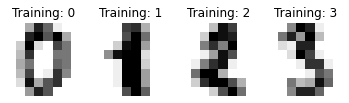

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_digits
import warnings
warnings.filterwarnings('ignore')

digits = load_digits()

images = digits.images
print(images.shape)
n_samples, height, width = images.shape
print(height)
y = digits.target
print(y)
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.axis('off')
    plt.imshow(images[i], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % y[i])

In [2]:
from grakel import Graph

print("Transforming images to graphs")
graphs = list()
edges = list()
edge_labels = dict()
for i in range(height):
    for j in range(width):
        if j < width-1:
            edges.append((i*height+j, i*height+j+1))
            edge_labels[(i*height+j, i*height+j+1)] = 1
        if i < height-1:
            edges.append((i*height+j, (i+1)*height+j))
            edge_labels[(i*height+j, (i+1)*height+j)] = 2

for i in range(n_samples):
    node_labels = dict()
    for j in range(height):
        for k in range(width):
            node_labels[j*height+k] = int(images[i,j,k]/4)
    
    graphs.append(Graph(edges, node_labels=node_labels, edge_labels=edge_labels))

Transforming images to graphs


In [3]:

print("Splitting dataset into train/test (1000/100 instances)")
graphs_train, graphs_test = graphs[:1000], graphs[1000:1100]
y_train, y_test = y[:1000], y[1000:1100]

Splitting dataset into train/test (1000/100 instances)


In [6]:
from time import time
from grakel.kernels import NeighborhoodSubgraphPairwiseDistance
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize neighborhood subgraph pairwise distance kernel
gk = NeighborhoodSubgraphPairwiseDistance(r=3, d=2)

print("Computing kernel matrics\n")
t0 = time()
print(graphs_train)
K_train = gk.fit_transform(graphs_train)
print(K_train)
K_test = gk.transform(graphs_test)
print("done in %0.3fs\n" % (time() - t0))

print("Classifying digits\n")
# Initialize SVM
clf = SVC(kernel='precomputed')

# Fit on the train Kernel
clf.fit(K_train, y_train)

# Predict and test.
y_pred = clf.predict(K_test)

# Calculate accuracy of classification.
print("Classification accuracy: %0.2f" % accuracy_score(y_test, y_pred))

Computing kernel matrics

[<grakel.graph.Graph object at 0x7f9648e6bfd0>, <grakel.graph.Graph object at 0x7f96052f8c70>, <grakel.graph.Graph object at 0x7f96052f8cd0>, <grakel.graph.Graph object at 0x7f96052f8bb0>, <grakel.graph.Graph object at 0x7f96052f8d00>, <grakel.graph.Graph object at 0x7f96055eb2b0>, <grakel.graph.Graph object at 0x7f96055eb550>, <grakel.graph.Graph object at 0x7f96055eb4c0>, <grakel.graph.Graph object at 0x7f96055eb520>, <grakel.graph.Graph object at 0x7f96055eb2e0>, <grakel.graph.Graph object at 0x7f96052c7b80>, <grakel.graph.Graph object at 0x7f96052c7af0>, <grakel.graph.Graph object at 0x7f96052c7b20>, <grakel.graph.Graph object at 0x7f96052c7a60>, <grakel.graph.Graph object at 0x7f96052c7a90>, <grakel.graph.Graph object at 0x7f96052c7250>, <grakel.graph.Graph object at 0x7f96052c7130>, <grakel.graph.Graph object at 0x7f96052c7100>, <grakel.graph.Graph object at 0x7f96052c71c0>, <grakel.graph.Graph object at 0x7f96052c71f0>, <grakel.graph.Graph object at 0x7

[[12.          4.68300894  4.89382178 ...  4.89334342  4.83018516
   5.07228508]
 [ 4.68300894 12.          5.81698149 ...  5.82956855  5.19033975
   5.58165484]
 [ 4.89382178  5.81698149 12.         ...  5.64133888  5.06921798
   5.54354927]
 ...
 [ 4.89334342  5.82956855  5.64133888 ... 12.          5.07108316
   6.437116  ]
 [ 4.83018516  5.19033975  5.06921798 ...  5.07108316 12.
   5.04584202]
 [ 5.07228508  5.58165484  5.54354927 ...  6.437116    5.04584202
  12.        ]]
done in 37.555s

Classifying digits

Classification accuracy: 0.85


In [13]:
from grakel.utils import graph_from_networkx
from grakel.kernels import WeisfeilerLehman, VertexHistogram
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Transform networkx graphs to grakel representations
# G_train = list(graph_from_networkx(G_train_nx, node_labels_tag='label'))
# G_test = list(graph_from_networkx(G_test_nx, node_labels_tag='label'))

# Initialize a Weisfeiler-Lehman subtree kernel
gk = WeisfeilerLehman(n_iter=1, normalize=False)

# Construct kernel matrices
K_train = gk.fit_transform(graphs_train)
K_test = gk.transform(graphs_test)

# Train an SVM classifier and make predictions
clf = SVC(kernel='precomputed')
clf.fit(K_train, y_train) 
y_pred = clf.predict(K_test)

# Evaluate the predictions
print("Accuracy:", accuracy_score(y_pred, y_test))

Accuracy: 0.62
